# ML Regression

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [1]:
import pandas as pd
df = pd.read_csv("mlb_weight_ht.csv")
df.head()


,Unnamed: 0,Name,Team,Position,Height(inches),Weight(pounds),Age
0,0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [2]:
df.shape

(1034, 7)

In [3]:
df.isnull().values.any()

True

In [4]:
df = df.dropna()
df.isnull().values.any()

False

In [5]:
df.shape

(1033, 7)

### Clean

In [6]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Unnamed: 0,Name,Team,Position,Height,Weight,Age
0,0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## EDA

In [7]:
df.describe()

,Unnamed: 0,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000,1033.000000
mean,516.380445,73.698935,201.689255,28.737648
std,298.754286,2.306330,20.991491,4.322298
min,0.000000,67.000000,150.000000,20.900000
25%,258.000000,72.000000,187.000000,25.440000
50%,516.000000,74.000000,200.000000,27.930000
75%,775.000000,75.000000,215.000000,31.240000
max,1033.000000,83.000000,290.000000,48.520000


## Model

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


### Create Features


In [9]:
var = df['Weight'].values
var.shape

(1033,)

In [10]:
y = df['Weight'].values #Target
y = y.reshape(-1, 1)
X = df['Height'].values #Feature(s)
X = X.reshape(-1,1)

In [11]:
#X = df[['Height', 'Age']].values

In [12]:
y.shape

(1033, 1)

### Split data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 1) (826, 1)
(207, 1) (207, 1)


### Fit the model

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [15]:
#lm.predict?

Returns Numpy Array

In [16]:
type(predictions)

numpy.ndarray

### Plot Predictions

Text(0, 0.5, 'Predicted Weight')

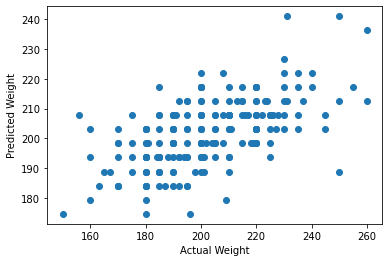

In [17]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

### Print Accuracy of Linear Regression Model

In [18]:
model.score(X_test, y_test)

0.35541166200063823

### Use Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [20]:
scores = cross_val_score(model, X, y, cv=6)
scores

array([0.29670427, 0.22459508, 0.29543549, 0.30012566, 0.19191046,
       0.34579806])

### Plot Cross-validation Predictions 

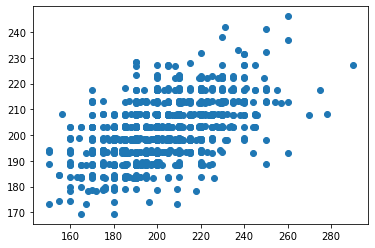

In [21]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [22]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.280770222008195

## Conclusion

* Cross-Validation improved Accuracy
* Adding more data or more features could improve the model
* Major League Baseball may be a strange set to predict Weight
* Bigger Data Set here:  http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
